# Basic PyTorch ANN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(32)
model = Model()

## Load the Iris Dataset

In [4]:
df = pd.read_csv('../Data/iris.csv')

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


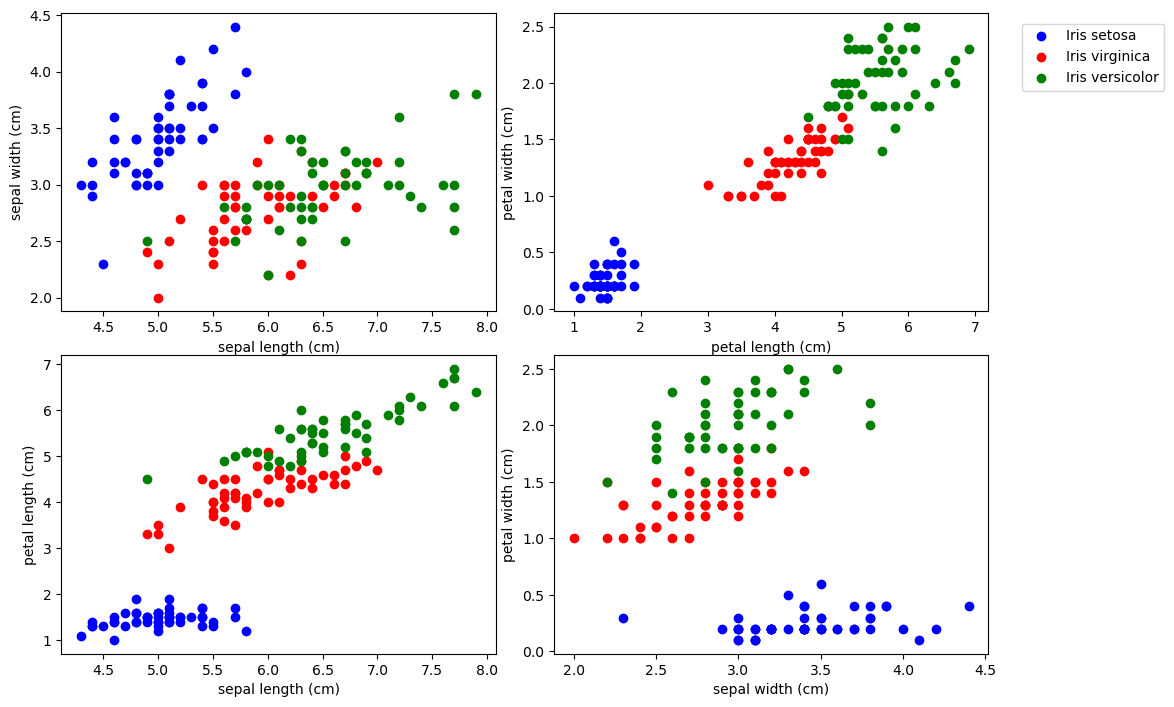

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [8]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train the Model

In [10]:
import time
start = time.time()

epochs = 1000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%5 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


end = time.time() - start
print(f'Total time {end}')

epoch:  1  loss: 1.15071142
epoch:  6  loss: 1.02363551
epoch: 11  loss: 0.93773144
epoch: 16  loss: 0.85550731
epoch: 21  loss: 0.77982575
epoch: 26  loss: 0.71124774
epoch: 31  loss: 0.60993999
epoch: 36  loss: 0.50028223
epoch: 41  loss: 0.40079933
epoch: 46  loss: 0.32352665
epoch: 51  loss: 0.25436318
epoch: 56  loss: 0.19554920
epoch: 61  loss: 0.15053052
epoch: 66  loss: 0.12006807
epoch: 71  loss: 0.10086945
epoch: 76  loss: 0.08894406
epoch: 81  loss: 0.08128313
epoch: 86  loss: 0.07607080
epoch: 91  loss: 0.07231427
epoch: 96  loss: 0.06944218
epoch: 101  loss: 0.06713330
epoch: 106  loss: 0.06520890
epoch: 111  loss: 0.06355970
epoch: 116  loss: 0.06212258
epoch: 121  loss: 0.06085380
epoch: 126  loss: 0.05972426
epoch: 131  loss: 0.05870985
epoch: 136  loss: 0.05779267
epoch: 141  loss: 0.05695847
epoch: 146  loss: 0.05619498
epoch: 151  loss: 0.05549227
epoch: 156  loss: 0.05484224
epoch: 161  loss: 0.05423797
epoch: 166  loss: 0.05367373
epoch: 171  loss: 0.05314468
epoch

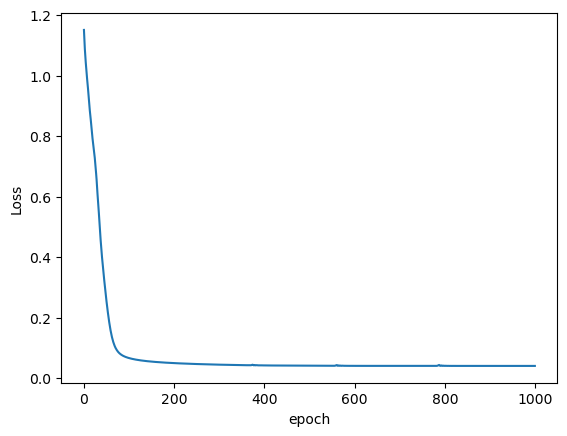

In [11]:
with torch.no_grad():
    plt.plot(range(epochs), losses)
    plt.ylabel('Loss')
    plt.xlabel('epoch');

In [12]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [13]:
loss

tensor(0.0462)

In [14]:
correct = 0

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        # remove .argmax().item() to get results tensor
        print(f'{i+1}.) {str(y_val.argmax().item())} {y_test[i]} ')
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'We got {correct} correct. ')
    
        

1.) 1 1 
2.) 1 1 
3.) 0 0 
4.) 1 1 
5.) 2 2 
6.) 2 2 
7.) 0 0 
8.) 0 0 
9.) 2 2 
10.) 2 2 
11.) 2 2 
12.) 0 0 
13.) 2 2 
14.) 1 1 
15.) 2 2 
16.) 1 1 
17.) 2 2 
18.) 0 0 
19.) 1 1 
20.) 2 2 
21.) 0 0 
22.) 0 0 
23.) 2 2 
24.) 0 0 
25.) 2 2 
26.) 2 2 
27.) 1 1 
28.) 1 1 
29.) 2 2 
30.) 2 2 
We got 30 correct. 


## Save trained model to a file

In [15]:
torch.save(model.state_dict(), 'my_iris_model.pt')
# torch.save(model, 'my_iris_model.pt') to save as a pickle file

## Load Model From File

In [16]:
new_model = Model() # must still have access to Model
new_model.load_state_dict(torch.load('my_iris_model.pt'))

C:\Users\cmurr\AppData\Local\Temp\ipykernel_11948\1054961021.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [17]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Apply to New Data

In [18]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

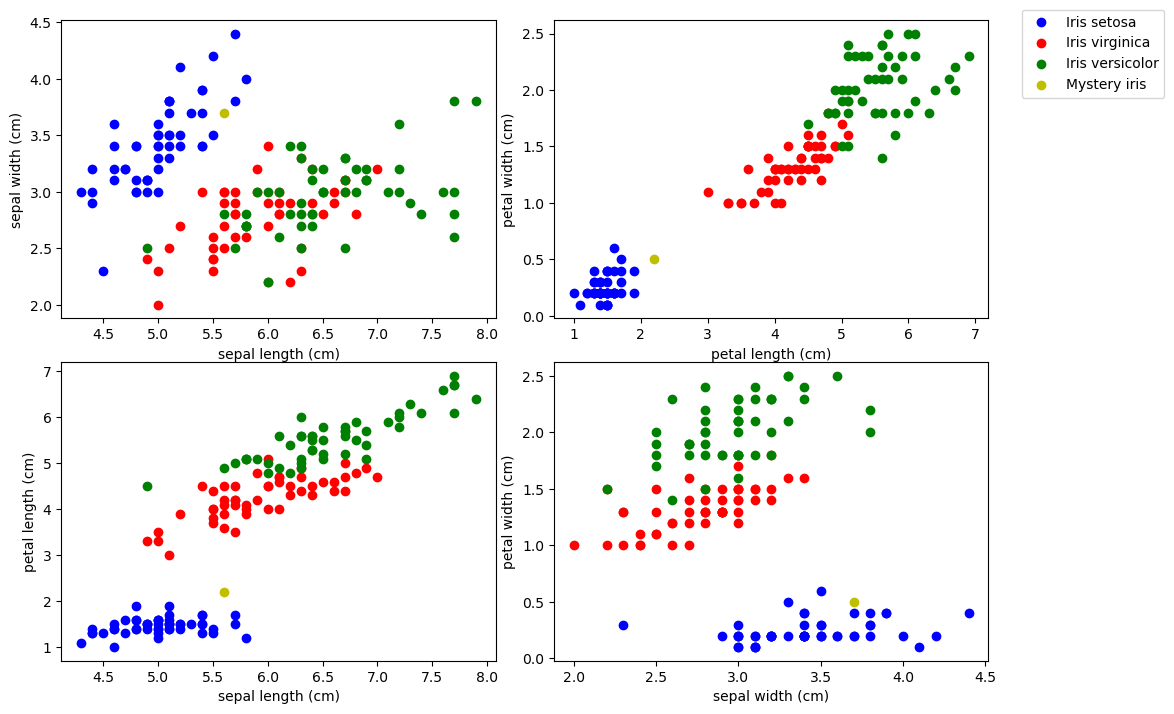

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [20]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([  8.8271,   2.9158, -13.7052])

Iris setosa
